<a href="https://colab.research.google.com/github/wambugu71/mental-health-messages-analysis/blob/main/indaba_zindi_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Main thing  was  about  mental health

# Mental health
- [x] The  main thing  in the  summit was  AI for  health and  mainly  mental health.

- [x] Note book author  `Wambugu kinyua`

In [ ]:
from tensorflow.keras import layers
from tensorflow import keras
from keras .preprocessing.text import  one_hot
import tensorflow as tf
from keras.layers  import  *
from sklearn.model_selection import train_test_split
from ast import literal_eval
from keras.utils import  pad_sequences
import  nltk
from nltk.tokenize import  word_tokenize
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.text import Tokenizer
nltk.download("punkt")
from sklearn.preprocessing  import  LabelEncoder
import numpy as np
import  re
import  seaborn as  sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
train  = pd.read_csv("Train.csv")
train.head()

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression
1,9JDAGUV3,Why do I get hallucinations?,Drugs
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,Why is life important?,Suicide
4,FYC0FTFB,How could I be helped to go through the depres...,Depression


In [ ]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
sentence = list(train["text"].str.lower())
x= []
for  sent in sentence:
  x.append(preprocess_text(sent))

In [ ]:
max_length  = 200
vectorizer = TextVectorization(max_tokens = max_length, output_sequence_length = 1800, output_mode='int')
vectorizer.adapt(x)
vectorizer_text = vectorizer(x)

<Axes: >

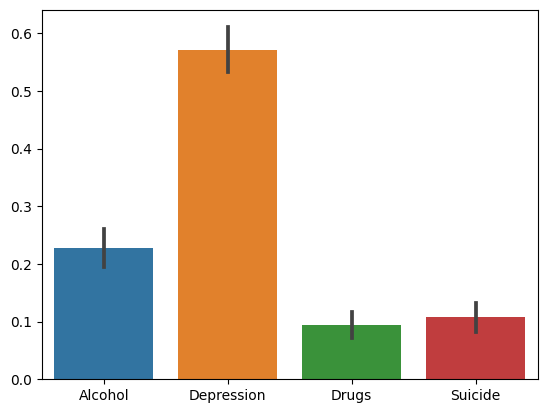

In [ ]:
sns.barplot(pd.get_dummies(train["label"]))

In [ ]:
y = pd.get_dummies(train["label"])
data_set = tf.data.Dataset.from_tensor_slices((vectorizer_text, y))
data_set = data_set.cache()
data_set = data_set.shuffle(160000)
data_set = data_set.batch(16)
data_set = data_set.prefetch(8) # helps bottlenecks
data_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 1800), dtype=tf.int64, name=None), TensorSpec(shape=(None, 4), dtype=tf.uint8, name=None))>

In [ ]:
len(data_set)*.7

27.299999999999997

In [ ]:
train = data_set.take(int(len(data_set)*.7))
val = data_set.skip(int(len(data_set)*.7)).take(int(len(data_set)*.2))
test = data_set.skip(int(len(data_set)*.9)).take(int(len(data_set)*.1))

In [ ]:
model = keras.Sequential([
    Embedding(max_length+1, 32),
    Bidirectional(LSTM(32,activation = 'tanh')),
    Dense(128,activation='relu'),
    Dense(256,activation = 'relu'),
    Dense(128,activation = 'relu'),
    Dense(4,activation = 'softmax')
])
model.compile(loss = 'BinaryCrossentropy',optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
             metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          6432      
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 4)                 516       
                                                      

In [ ]:
history = model.fit(train, epochs = 15,validation_data = val)

Epoch 1/15
27/27 [==============================] - 16s 328ms/step - loss: 0.6865 - accuracy: 0.5694 - val_loss: 0.6777 - val_accuracy: 0.5982
Epoch 2/15
27/27 [==============================] - 3s 123ms/step - loss: 0.6650 - accuracy: 0.5532 - val_loss: 0.6417 - val_accuracy: 0.5893
Epoch 3/15
27/27 [==============================] - 4s 138ms/step - loss: 0.6002 - accuracy: 0.5856 - val_loss: 0.5355 - val_accuracy: 0.6071
Epoch 4/15
27/27 [==============================] - 3s 103ms/step - loss: 0.4881 - accuracy: 0.5903 - val_loss: 0.4444 - val_accuracy: 0.6250
Epoch 5/15
27/27 [==============================] - 3s 96ms/step - loss: 0.4708 - accuracy: 0.5694 - val_loss: 0.4459 - val_accuracy: 0.6161
Epoch 6/15
27/27 [==============================] - 3s 119ms/step - loss: 0.4495 - accuracy: 0.5972 - val_loss: 0.4637 - val_accuracy: 0.5804
Epoch 7/15
27/27 [==============================] - 2s 90ms/step - loss: 0.4630 - accuracy: 0.5833 - val_loss: 0.5034 - val_accuracy: 0.4911
Epoch 8

In [ ]:
model.save("indabax_summit3.h5")

<Figure size 800x500 with 0 Axes>

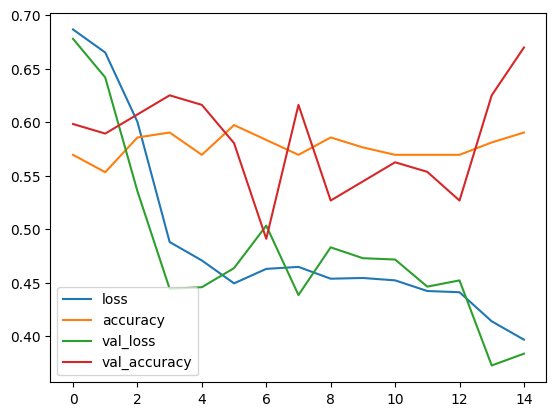

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [ ]:
input_text = vectorizer('How to overcome bad feelings and emotions')
res = model.predict(np.expand_dims(input_text,0))
(res > 0.5).astype(int)
#print(dataset.columns[2:])
batch_X, batch_y = test.as_numpy_iterator().next()
(model.predict(batch_X) > 0.5).astype(int)
res.shape
pred = np.round(np.array(res).flatten(), 0)

1/1 [==============================] - 0s 48ms/step


In [ ]:
print(pred)
y.columns

[0. 1. 0. 0.]


Index(['Alcohol', 'Depression', 'Drugs', 'Suicide'], dtype='object')

In [ ]:
test = pd.read_csv("Test.csv")
test.head()

,ID,text
0,02V56KMO,How to overcome bad feelings and emotions
1,03BMGTOK,I feel like giving up in life
2,03LZVFM6,I was so depressed feel like got no strength t...
3,0EPULUM5,I feel so low especially since I had no one to...
4,0GM4C5GD,can i be successful when I am a drug addict?


In [ ]:
test_data = test["text"]
submission  = []
for  text in test_data:
  my_text = vectorizer(text)
  res2 = model.predict(np.expand_dims(input_text,0))
  submission.append(np.round(np.array(res2).flatten(), 0))

1/1 [==============================] - 0s 54ms/step


In [ ]:
data = pd.DataFrame(submission,columns=['Alcohol', 'Depression', 'Drugs', 'Suicide'])
data["ID"] = test["ID"]

In [ ]:
df = data[["ID", 'Alcohol', 'Depression', 'Drugs', 'Suicide']]
df

,ID,Alcohol,Depression,Drugs,Suicide
0,02V56KMO,0.0,1.0,0.0,0.0
1,03BMGTOK,0.0,1.0,0.0,0.0
2,03LZVFM6,0.0,1.0,0.0,0.0
3,0EPULUM5,0.0,1.0,0.0,0.0
4,0GM4C5GD,0.0,1.0,0.0,0.0
...,...,...,...,...,...
304,Z9A6ACLK,0.0,1.0,0.0,0.0
305,ZDUOIGKN,0.0,1.0,0.0,0.0
306,ZHQ60CCH,0.0,1.0,0.0,0.0
307,ZVIJMA4O,0.0,1.0,0.0,0.0


In [ ]:
df.to_csv